In [90]:
import kaggle as kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
import kaggle
import pandas as pd
import os
import pathlib

dataset_name = 'akram24/social-network-ads'
download_path = './datasets'

try:
    pathlib.Path(download_path).mkdir(parents=True, exist_ok=True)
    kaggle.api.dataset_download_files(dataset_name, path=download_path, unzip=True)
    print("Dataset downloaded successfully!")

    # **Inspect the directory structure after download**
    # Find the actual path to Social_Network_Ads.csv
    for root, _, files in os.walk(download_path):
        for file in files:
            if file == 'Social_Network_Ads.csv':
                csv_filepath = os.path.join(root, file)
                break
        else:
            continue
        break  # Exit after finding the file

    if not os.path.exists(csv_filepath):
        raise FileNotFoundError(f"CSV file not found in {download_path}")

    df = pd.read_csv(csv_filepath)
    print("Dataset loaded successfully!")
    print(df.head())

except kaggle.api.kaggle_api_exception.ApiException as e:
    print(f"Kaggle API error: {e}")
except FileNotFoundError as e:
    print(f"File not found error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Dataset URL: https://www.kaggle.com/datasets/akram24/social-network-ads
Dataset downloaded successfully!
Dataset loaded successfully!
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [95]:
df.isnull().sum()
df = df.drop('Gender', axis=1)
df = df.drop('User ID', axis=1)

# Train Test Split

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [99]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit the scaler to the training Data, it will learn the parameter
scaler.fit(X_train)
#transform train and test split
x_train_scale = scaler.transform(X_train)
x_test_scale = scaler.transform(X_test)

In [98]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [49]:
x_train_scale = pd.DataFrame(x_train_scale, columns=X_train.columns)
x_test_scale = pd.DataFrame(x_test_scale, columns=X_test.columns)

In [50]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [51]:
np.round(x_train_scale.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of Scaling

Text(0.5, 1.0, 'After Scaling')

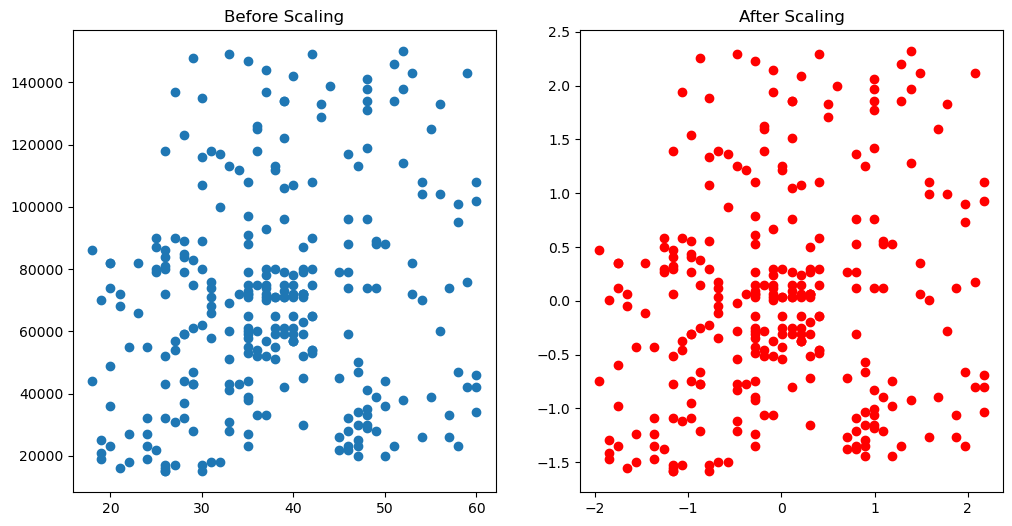

In [59]:
import seaborn as sns
fig, (axe1, axe2) = plt.subplots(ncols=2, figsize=(12,6))
# before scaling
axe1.scatter(X_train['Age'], X_train['EstimatedSalary'])
axe1.set_title('Before Scaling')
#after scaling
axe2.scatter(x_train_scale['Age'], x_train_scale['EstimatedSalary'], color='r')
axe2.set_title('After Scaling')


In [ ]:
# 

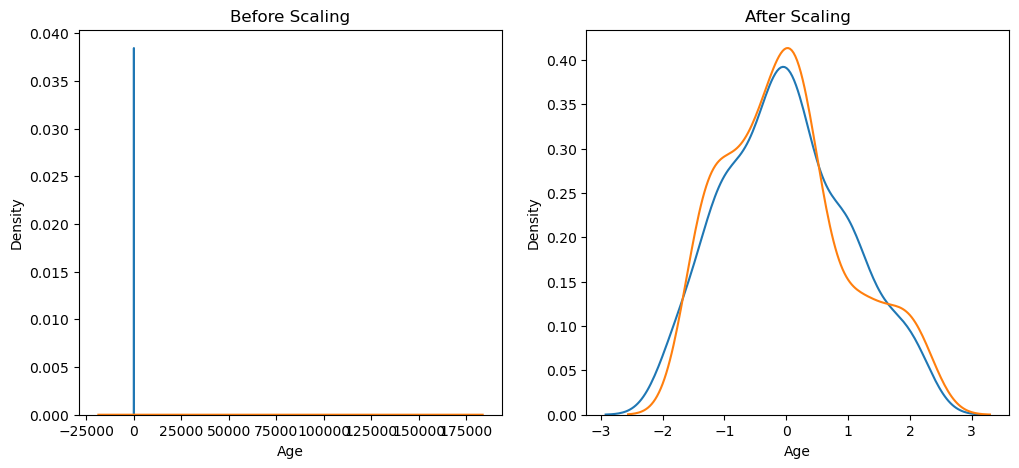

In [69]:
fig, (axe1, axe2) = plt.subplots(ncols=2, figsize=(12,5))
# before scaling
axe1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=axe1)
sns.kdeplot(X_train['EstimatedSalary'], ax=axe1)
#after scaling
axe2.set_title('After Scaling')
sns.kdeplot(x_train_scale['Age'], ax=axe2)
sns.kdeplot(x_train_scale['EstimatedSalary'], ax=axe2)
plt.show()

# Comparison of Distributions

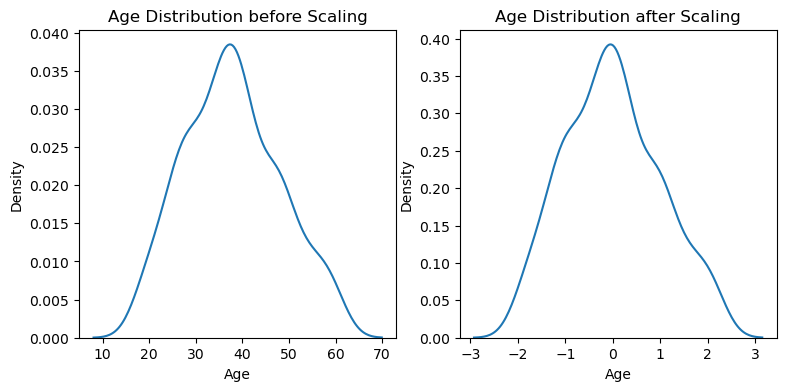

In [76]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9,4))
#before scaling
ax1.set_title('Age Distribution before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

#after scaling
ax2.set_title('Age Distribution after Scaling')
sns.kdeplot(x_train_scale['Age'], ax=ax2)
plt.show()

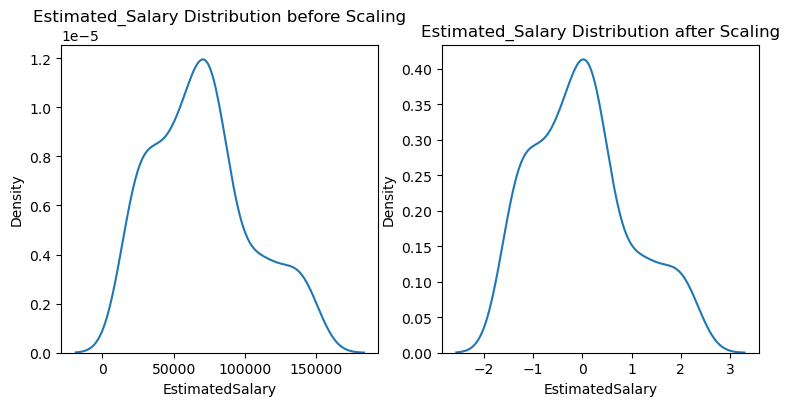

In [77]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9,4))
#before scaling
ax1.set_title('Estimated_Salary Distribution before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

#after scaling
ax2.set_title('Estimated_Salary Distribution after Scaling')
sns.kdeplot(x_train_scale['EstimatedSalary'], ax=ax2)
plt.show()

# Why Scaling Is Important

In [80]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [82]:
lr.fit(X_train, y_train)
lr_scaled.fit(x_train_scale, y_train)

LogisticRegression()

In [88]:
y_pred = lr.predict(X_test)
y_pred_scale = lr_scaled.predict(x_test_scale)

In [104]:
from sklearn.metrics import accuracy_score
print('Actual : ', accuracy_score(y_test,y_pred))
print('Scaled : ', accuracy_score(y_test, y_pred_scale))

Actual :  0.875
Scaled :  0.8666666666666667
